In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./DiamondsPrices.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
# 將cut、color、clarity轉成數值，並新增對應的欄位
df_encoded = pd.get_dummies(df, columns=['cut', 'color', 'clarity'], drop_first=True)

df_encoded


,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 將資料分成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('price', axis=1), df_encoded['price'], test_size=0.3, random_state=42)

# 將資料標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y_train)
X_test_scaled = scaler.transform(X_test)

# 建立線性迴歸模型
model = LinearRegression()

# 在訓練集上進行模型訓練
model.fit(X_train_scaled, y_train)

# 輸出迴歸係數
print(model.coef_)


[ 5338.61567061   -90.17381703   -60.33227991 -1100.41885004
    -6.45891672   -34.25894462   170.60293265   414.36951486
   339.23920411   310.65425625   -83.64002086  -104.56099268
  -202.86356354  -362.00229958  -442.78356742  -529.44921589
   975.93364117  1611.5716809   1042.92121499  1670.31849636
  1817.66420828  1284.80947523  1461.03419387]


In [5]:
# 輸出迴歸係數，找出影響最大的要素
coef = pd.DataFrame({'feature': X_train.columns, 'coefficient': abs(model.coef_)}).sort_values(by='coefficient', ascending=False)
coef

,feature,coefficient
0,carat,5338.615671
20,clarity_VS2,1817.664208
19,clarity_VS1,1670.318496
17,clarity_SI1,1611.571681
22,clarity_VVS2,1461.034194
21,clarity_VVS1,1284.809475
3,x,1100.418850
18,clarity_SI2,1042.921215
16,clarity_IF,975.933641
15,color_J,529.449216


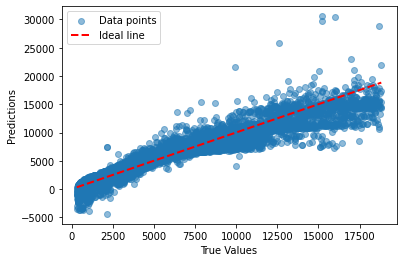

In [6]:
# 用模型進行預測
y_pred = model.predict(X_test_scaled)

# 繪製實際值和預測值的散點圖
plt.scatter(y_test, y_pred, alpha=0.5)

# 繪製對角線
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# 設置坐標軸標籤和圖例
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend(['Data points', 'Ideal line'])

# 顯示圖形
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# 預測測試集資料
y_pred = model.predict(X_test_scaled)

# 計算MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# 計算R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

MSE: 1244765.4357158677
R-squared: 0.9201866914388088


In [8]:
from sklearn.metrics import confusion_matrix

# 將預測值轉換為二元分類結果
y_pred_binary = (y_pred > 5000).astype(int)

# 將實際目標值轉換為二元分類結果
y_test_binary = (y_test > 5000).astype(int)

# 計算混淆矩陣
conf_mat = confusion_matrix(y_test_binary, y_pred_binary)

print(conf_mat)

[[11168   679]
 [   41  4294]]


In [9]:
# 建立 Linear Regression 模型
model = LinearRegression()

# 分離自變數和因變數
X = scaler.fit_transform(df[['x', 'y', 'z']], df['price'])
y = df['price']

# 在訓練集上進行模型訓練
model.fit(X, y)

# 輸出迴歸係數
print(model.coef_)

[3130.04342244  249.88271997  159.4232457 ]


In [10]:
# 預測測試集資料
y_pred = model.predict(X)

# 計算MSE
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)

# 計算R-squared
r2 = r2_score(y, y_pred)
print("R-squared:", r2)

MSE: 3460908.182152649
R-squared: 0.7825425402126273


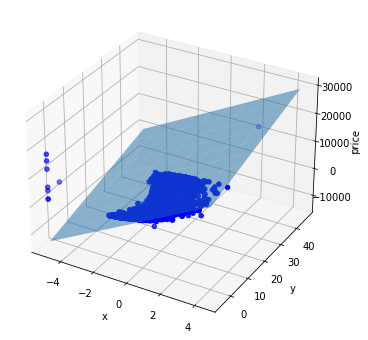

In [11]:

# 繪製散佈圖
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='blue')

# 繪製回歸平面
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
x1, x2 = np.meshgrid(x1, x2)
z = model.intercept_ + model.coef_[0]*x1 + model.coef_[1]*x2
ax.plot_surface(x1, x2, z, alpha=0.5)

# 設置坐標軸標籤
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('price')

# 顯示圖形
plt.show()


In [16]:
from scipy.stats import kruskal

# 依照clarity分組並進行Kruskal-Wallis檢定
grp_clarity = df.groupby("clarity")
clarity_price = [grp_clarity.get_group(clarity)["price"] for clarity in grp_clarity.groups]
stat, pvalue = kruskal(*clarity_price)

# 印出結果
print("Kruskal-Wallis test result:")
print("statistic = %.2f, p-value = %.2e" % (stat, pvalue))

Kruskal-Wallis test result:
statistic = 2718.19, p-value = 0.00e+00


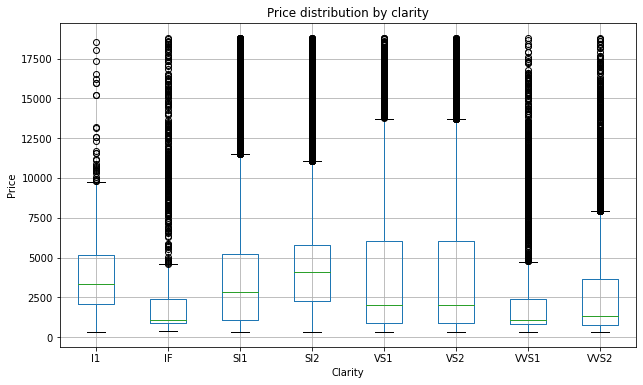

In [18]:
# 繪製盒狀圖
df.boxplot(column="price", by="clarity", figsize=(10,6))

# 設置標題和軸標籤
plt.title("Price distribution by clarity")
plt.suptitle("")
plt.xlabel("Clarity")
plt.ylabel("Price")

# 顯示圖形
plt.show()